In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("CrimesChicago.csv", delimiter=',', index_col=0, iterator=True)
crime_df = pd.concat(df, ignore_index=True).reset_index()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
crime_df.shape

(7079493, 22)

In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079493 entries, 0 to 7079492
Data columns (total 22 columns):
index                   int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.1+ GB


In [5]:
crime_df.head()

,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,1,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,2,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,3,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,4,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [6]:
crime_df.isnull().sum()

index                        0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6302
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614828
Community Area          613495
FBI Code                     0
X Coordinate             67941
Y Coordinate             67941
Year                         0
Updated On                   0
Latitude                 67941
Longitude                67941
Location                 67941
dtype: int64

### Visual output of the columns and size of the missing data

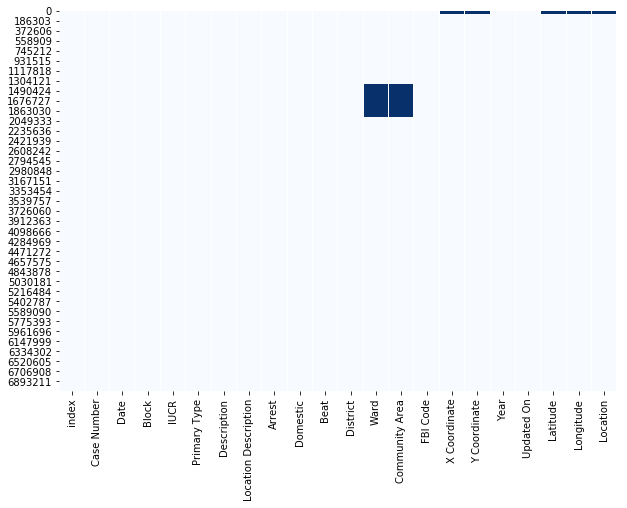

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(crime_df.isnull(), cbar = False, cmap = 'Blues')

## Data Cleaning

In [8]:
crime_df.Date = pd.to_datetime(crime_df.Date, format='%m/%d/%Y %I:%M:%S %p')
crime_df.index = pd.DatetimeIndex(crime_df.Date)

In [9]:
crime_df=crime_df[pd.notnull(crime_df['Location Description'])]
crime_df=crime_df[pd.notnull(crime_df['District'])]

In [10]:
crime_df.drop(['Ward', 'Community Area', 'Latitude', 'Longitude', 'Location'], axis=1, inplace=True)

#### Correlation between attributes

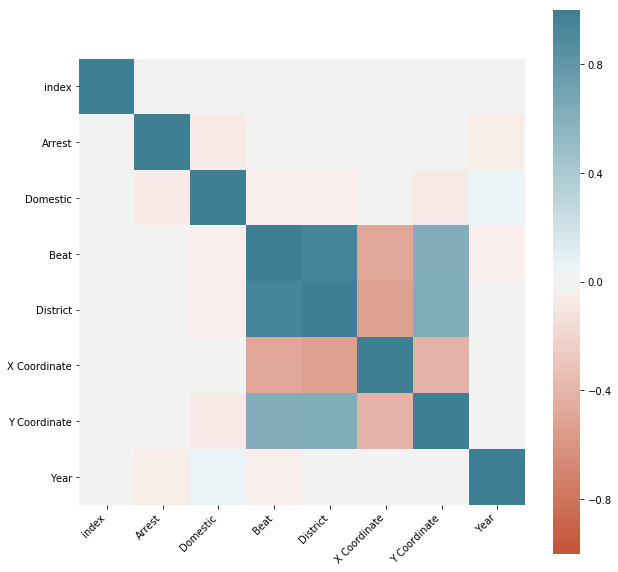

In [11]:
corr = crime_df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### The correlation map shows the correlation coefficient between the sets of various variables

## 2. Crimes vs Date/Time

### Number of crimes by month of the year

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


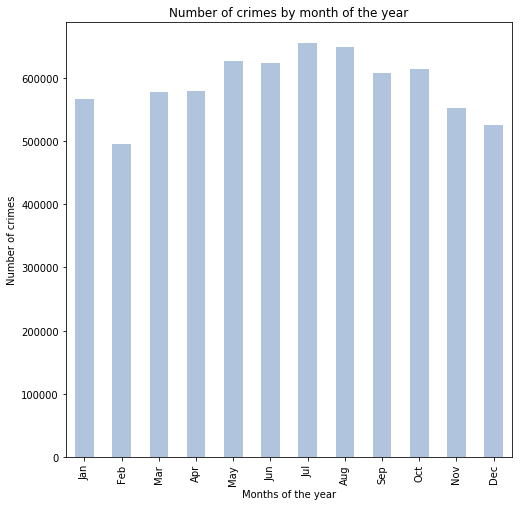

In [12]:
plt.figure(figsize=(8,8))
crime_df.groupby(crime_df.index.month).size().plot(kind='bar', legend=False, color='#B0C4DE')
ax = plt.subplot()
plt.xlabel('Months of the year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by month of the year')
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(mon)
plt.show()

#### It can be observed that most crimes occur in the months July and August on an average. 
#### A possible reason for this could be the Celebration of 4th of July which results in most of them being out. Thus, we can see that July has the highest number of crimes every year on an average.


### Number of crimes by day of the week

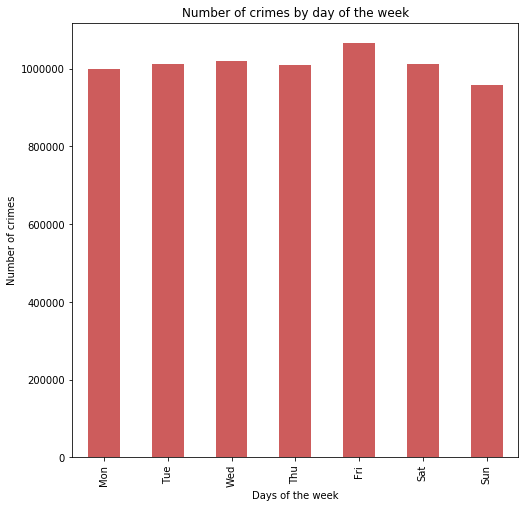

In [13]:
plt.figure(figsize=(8,8))
crime_df.groupby([crime_df.index.dayofweek]).size().plot(kind='bar', color='#CD5C5C')
plt.xlabel('Days of the week')
days = ['Mon','Tue','Wed',  'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(7), days)
plt.ylabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

#### It can be seen that crimes on Friday are higher than other days of the week. A possible reason could be the start of the weekend. 

## 3. Crimes over the year

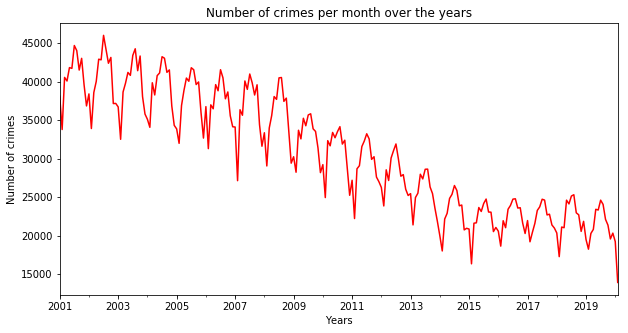

In [14]:
plt.figure(figsize=(10,5))
crime_df.resample('M').size().plot(legend=False, color='Red')
plt.title('Number of crimes per month over the years')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

#### It can be observed that the crimes over the years are decreasing until the year 2013 and plateaus thereafter. 
#### Also, the crimes observed over the months in every year are seasonal.

### 4.Crime vs Arrest

In [15]:
#No of arrests and non arrests
crime_df['Arrest'].value_counts()

False    5130115
True     1943029
Name: Arrest, dtype: int64

In [16]:
arrest_true=crime_df[crime_df['Arrest']==1]['Primary Type'].value_counts().to_frame()
arrest_true

,Primary Type
NARCOTICS,725281
BATTERY,293933
THEFT,177400
CRIMINAL TRESPASS,146459
ASSAULT,101461
OTHER OFFENSE,79430
PROSTITUTION,68884
WEAPONS VIOLATION,61555
CRIMINAL DAMAGE,56561
DECEPTIVE PRACTICE,45280


In [17]:
primary_type=crime_df[crime_df['Arrest']==1]['Primary Type'].sort_values(ascending=False).value_counts().index.tolist()
arrest_true=crime_df[crime_df['Arrest']==1]['Primary Type'].value_counts().tolist()

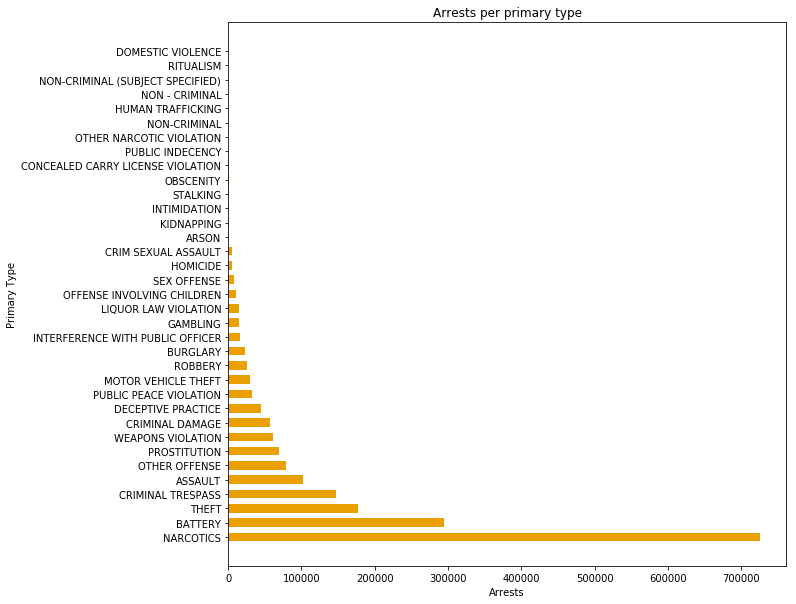

In [18]:
plt.figure(figsize=(10,10))
plt.barh(primary_type,arrest_true,height=0.6,color ='#E9A000')
plt.title('Arrests per primary type')
plt.xlabel('Arrests')
plt.ylabel('Primary Type')
plt.yticks(primary_type,fontsize=10)
plt.show()

#### It can be seen that Narcotics crime type has the highest number of arrests made, whereas crime like battery and theft have cases where there was no arrest warrant issued. Thus, a possibility is that only serious crimes are issued an arrest warrant

### 5. Locations with High Crime Rate

Text(0.5, 1.0, 'Crime Distribution per District')

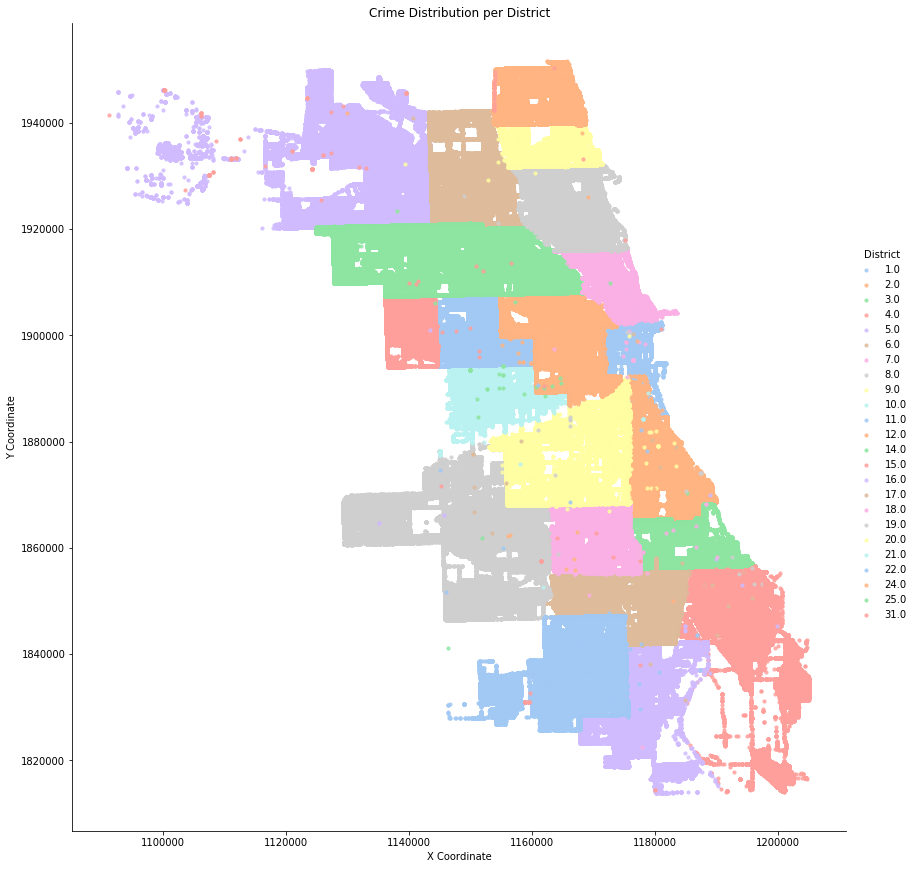

In [19]:
data = crime_df.loc[(crime_df['X Coordinate']!=0)]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=data[:],
           fit_reg=False, 
           hue="District",
           palette='pastel',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crime Distribution per District")

In [20]:
crime_location = pd.DataFrame(crime_df.groupby('Location Description').size().sort_values(ascending=False).rename('Count').reset_index())
crime_location.head()

,Location Description,Count
0,STREET,1841989
1,RESIDENCE,1198741
2,APARTMENT,742524
3,SIDEWALK,690311
4,OTHER,270331


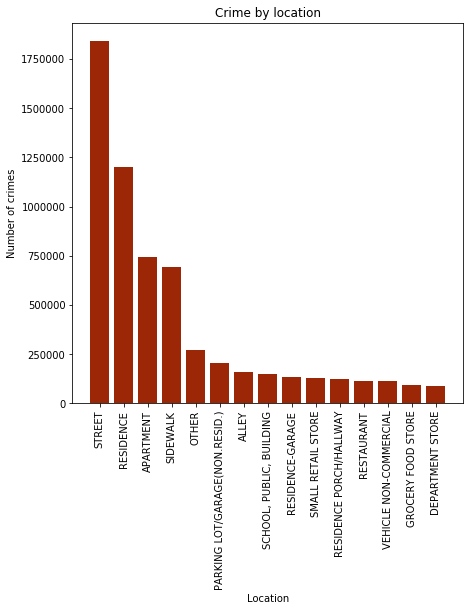

In [21]:
plt.figure(figsize=(7,7))
plt.bar(crime_df['Location Description'].value_counts().index.tolist()[0:15],\
        crime_df['Location Description'].value_counts().tolist()[0:15],color = '#9C2706')
plt.title('Crime by location')
plt.xlabel('Location')
plt.ylabel('Number of crimes')
plt.xticks(crime_df['Location Description'].value_counts().index.tolist()[0:15],rotation=90)
plt.show()

#### It can be seen from the above analysis that most of the crimes occur on streets. Also, the lmplot shows the crime distribution across different districts around Chicago.

### 6. Percentage of domestic crimes that ended an arrest

In [22]:
domarr_false, domarr_true = crime_df[crime_df['Domestic']==1]['Arrest'].value_counts()

In [23]:
dom_false, dom_true = crime_df['Domestic'].value_counts()

In [24]:
arr_false, arr_true = crime_df['Arrest'].value_counts()

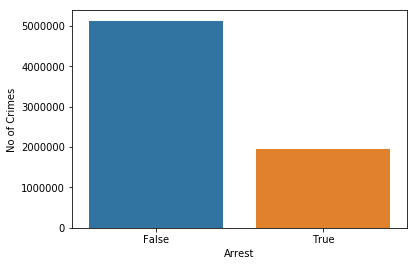

In [30]:
sns.countplot(x='Arrest',data=crime_df)
plt.ylabel('No of Crimes')
plt.show()

In [25]:
domarr_true/(dom_true+arr_true)*100

6.406331070188923

#### Percentage of domestic crimes that ended an arrest is 6.4%

### 7. a. Number of arrests per crime groups

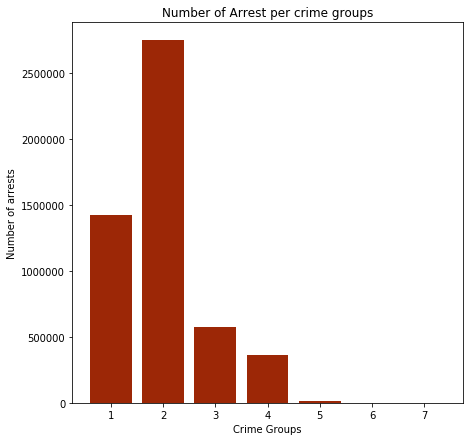

In [26]:
crimeGroups = {'NARCOTICS' : '3', 'BATTERY' : '1', 'THEFT':'2', 'WEAPONS VIOLATION': '5', 'CRIMINAL TRESPASS' : '2',
'OTHER OFFENSE' : '4','ASSAULT' : '1','CRIMINAL DAMAGE' : '2','INTERFERENCE WITH PUBLIC OFFICER' : '1',
'PUBLIC PEACE VIOLATION' : '1', 'DECEPTIVE PRACTICE' : '3','ROBBERY' : '2','PROSTITUTION' : '3',
'BURGLARY' : '2','MOTOR VEHICLE THEFT' : '3','OFFENSE INVOLVING CHILDREN' : '3',
'LIQUOR LAW VIOLATION' : '3','CONCEALED CARRY LICENSE VIOLATION' : '5',
'GAMBLING' : '3','SEX OFFENSE' : '1','HOMICIDE' : '1','CRIM SEXUAL ASSAULT' : '1',
'OBSCENITY' : '1','ARSON' : '2','STALKING' : '1','PUBLIC INDECENCY' : '3',
'INTIMIDATION' : '1', 'DOMESTIC VIOLENCE' : '1','KIDNAPPING': '1', 'NON-CRIMINAL (SUBJECT SPECIFIED)':'6',
'OTHER NARCOTIC VIOLATION' : '3', 'NON - CRIMINAL' : '6', 'RITUALISM' : '7', 'HUMAN TRAFFICKING' : '1',
              'NON-CRIMINAL' : '6'}
crime_df['crimeGroups'] = crime_df['Primary Type'].apply(lambda x : crimeGroups[x])
cri_gro=crime_df[crime_df['Arrest'] == 0 ]['crimeGroups'].value_counts().sort_index().index.tolist()
arr_false=crime_df[crime_df['Arrest'] == 0]['crimeGroups'].value_counts().sort_index().tolist()
plt.figure(figsize=(7,7))
plt.bar(cri_gro,arr_false, color = '#9C2706')
plt.title('Number of Arrest per crime groups')
plt.xlabel('Crime Groups')
plt.ylabel('Number of arrests')
plt.show()

#### Group 2 crimes comprises the maximum number of arrests as compared to other crime groups. 

### 7.b. Number of crimes in each District

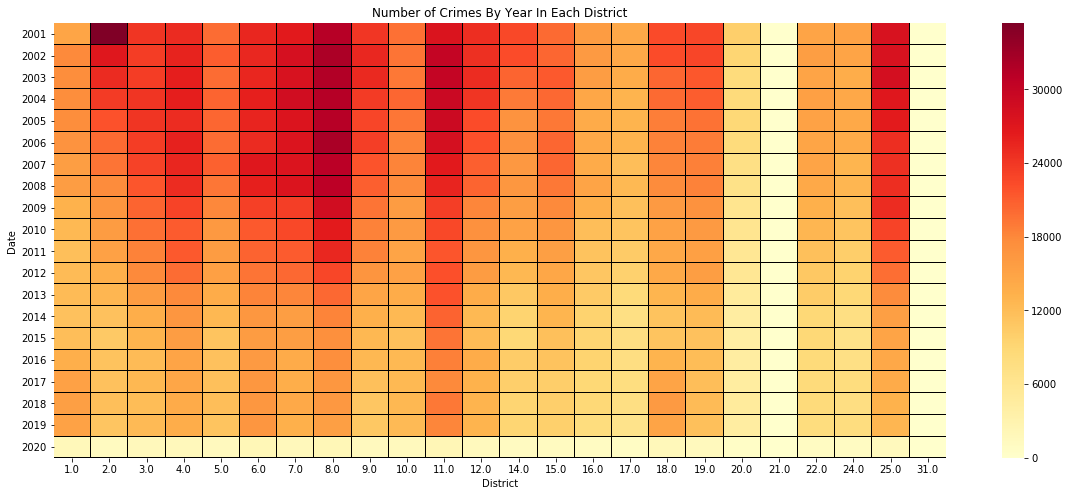

In [29]:
Crime_By_Dist= crime_df.pivot_table('Arrest', aggfunc = np.size, columns = 'District',
                               index = crime_df.index.year, fill_value = 0)
plt.figure(figsize = (20,8))
plt.title('Number of Crimes By Year In Each District')
hm = sns.heatmap(Crime_By_Zip, cmap = 'YlOrRd', linewidth = 0.01, linecolor = 'k')

#### The above heat map shows that district 2 had the highest number of crimes in the year 2001 in comarision to other districts. Also, the heatmap shows that the number of crimes have been decreasing every year. 

### 7.c Crimes vs Hours of the day

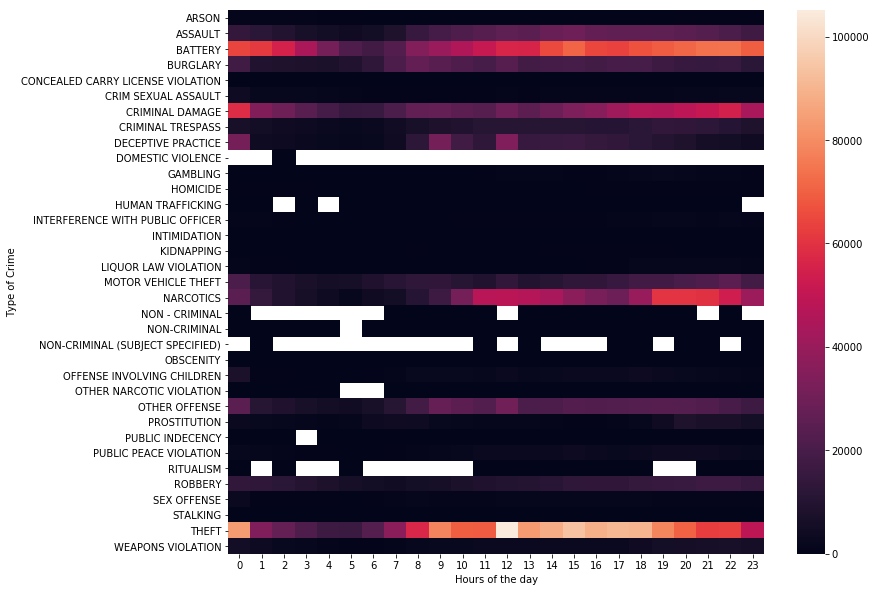

In [34]:
hourly_crimes = crime_df.pivot_table(values='index', index='Primary Type',columns=crime_df['Date'].dt.hour, aggfunc=np.size)
plt.figure(figsize = (12,10))
sns.heatmap(hourly_crimes)
plt.xlabel('Hours of the day')
plt.ylabel('Type of Crime')
plt.show()

#### It can be visualized that Domestic Violence does not account to time and are in large numbers followed by Battery and theft. 